<html>
<body>
<p style="font-size:17px;color:blue;">ΠΑΠΑΔΟΠΟΥΛΟΣ ΝΙΚΟΛΑΟΣ 4140</p>
</body>
</html>

<html>
<body>
<p style="font-size:20px;color:blue;">ΑΣΚΗΣΗ 3</p>
<p style="font-size:15px;color:#64B5F6;">Στήσιμο</p>
</body>
</html>


Παρακάτω αποθηκεύω τις επιχειρήσεις του dataset οι οποίες είναι από το Toronto και έχουν τουλάχιστον 10 reviews. Aξίζει να σημειωθεί ότι αν κάποια επιχείρηση έχει παραπάνω από μία κατηγορία από αυτές που ζητούνται, κρατάω μία από αυτές με την εξής σειρά προτεραιότητας: "Beauty & Spas" πρώτα, "Shopping" δεύτερο, "Bars" τρίτο.

In [1]:
import numpy as np
import json
import ijson # library which will be used to read the review dataset line by line, without loading it in memory


business_dict = {} # dictionary with business id's as keys and the list [category, review_texts] as values

with open('yelp_academic_dataset_business.json', 'r',encoding = "utf8") as f:
    for line in f.readlines():
        dictionary = json.loads(line)
        if((dictionary['city'] == 'Toronto') and (dictionary['review_count'] >= 10)):
            categories = dictionary['categories']
            categ_lst = []

            if(categories):
                categories = categories.split(', ')
                
                for i in range(len(categories)):
                    if(categories[i] == "Beauty & Spas" or categories[i] == "Shopping" or categories[i] == "Bars"):
                
                        categ_lst.append(categories[i])

            if(not categ_lst): # if list is empty, then none of the wanted categories have been found
                continue
            else: # priority order: "Beauty & Spas" first, "Shopping" second, "Bars" third in case more than one is present in the attributes
                if("Beauty & Spas" in categ_lst):
                    business_dict[dictionary["business_id"]] = ["Beauty & Spas", ""]
                elif("Shopping" in categ_lst):
                    business_dict[dictionary["business_id"]] = ["Shopping", ""]
                else:
                    business_dict[dictionary["business_id"]] = ["Bars", ""]

with open('yelp_academic_dataset_review.json ', 'r', encoding = "utf8") as f1:   
    parser = ijson.parse(f1, multiple_values = True) 

    business_id = ''  
    
    for prefix, event, value in parser:
        if(prefix == "business_id"):
            business_id = value
        if(prefix == "text"):
            if(business_id in business_dict.keys()):
                new_text = value
                previous_text = business_dict[business_id][1]
                joined_text = ' '.join([previous_text, new_text])
                business_dict[business_id][1] = joined_text
            business_id = ''


Εδώ δοκιμάζω text processing με vectoriser που χρησιμοποιεί μονάχα τον παράγοντα min_df=2. Το αποτέλεσμα δεν είναι ιδιαίτερα καλό, καθώς περιέχει πολλές αριθμητικές (δεν είναι χρήσιμες για clustering) και ακόμα και κινέζικες λέξεις. Επίσης, εμφανίζονται stop words.

In [3]:
import sklearn as sk
import sklearn.feature_extraction.text as sk_text

corpus = []

for key in business_dict.keys():
    corpus.append(business_dict[key][1])
    
vectorizer = sk_text.TfidfVectorizer(min_df=2)
X = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

47279
['00', '000', '007', '00am', '00ish', '00p', '00pm', '00s', '01', '01pm', '02', '02pm', '03', '04', '05', '05am', '05pm', '06', '069', '07', '08', '08pm', '09', '0g', '0mg', '0z', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '10000000x', '1000s', '1000th', '1000x', '100db', '100ft', '100g', '100k', '100km', '100lb', '100m', '100ml', '100pp', '100s', '100th', '100x', '101', '1015', '102', '103', '1030', '1030am', '1030pm', '104', '1045', '1045pm', '105', '1050', '1055', '105lbs', '106', '107', '108', '109', '10am', '10c', '10ft', '10g', '10ish', '10k', '10km', '10m', '10min', '10mins', '10minute', '10minutes', '10ml', '10mm', '10oz', '10p', '10pc', '10pm', '10pp', '10ppl', '10s', '10th', '10w30', '10x', '10years', '10yr', '11', '110', '1100', '111', '112', '113', '1130', '1130am', '1130pm', '114', '1145', '115', '116', '117', '118', '119', '11a', '11am', '11ish', '11oz', '11p', '11pm', '11th', '11x14', '12', '120', '1200', '1200s', '120v', '121', '122', '123', '1

Εδώ δοκιμάζω text processing με vectoriser που χρησιμοποιεί μονάχα τον παραάγοντα min_df=2 και stop_words = 'english'. Το αποτέλεσμα είναι σαφώς καλύτερο. Εμφανίζω τις λέξεις που αφαιρούνται από το σύνολο και είναι προφανές ότι αυτές δεν μας χρειάζονται.

In [3]:
vectorizer = sk_text.TfidfVectorizer(stop_words = 'english', min_df=2)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_stop_words())


frozenset({'without', 'her', 'is', 'where', 'beyond', 'thick', 'herein', 'fill', 'two', 'former', 'from', 'whereas', 'hereupon', 'cant', 'must', 'amoungst', 'how', 'very', 'whereby', 'none', 'often', 'four', 'each', 'themselves', 'please', 'them', 'sincere', 'although', 'upon', 'until', 'anyhow', 'bill', 'whoever', 'ourselves', 'any', 'ours', 'throughout', 'hereafter', 'whole', 'detail', 'anywhere', 'had', 'hereby', 'between', 'found', 're', 'own', 'inc', 'done', 'have', 'also', 'whereupon', 'should', 'it', 'will', 'someone', 'put', 'ie', 'they', 'are', 'mine', 'thereafter', 'everything', 'onto', 'was', 'nobody', 'everywhere', 'she', 'enough', 'yourself', 'toward', 'out', 'except', 'formerly', 'can', 'once', 'less', 'still', 'even', 'wherein', 'yet', 'too', 'so', 'together', 'many', 'however', 'on', 'name', 'take', 'may', 'anything', 'nor', 'ten', 'due', 'became', 'their', 'among', 'my', 'thru', 'several', 'thereby', 'we', 'bottom', 'whence', 'both', 'other', 'through', 'therein', 'six

Εδώ κρατάω τις προηγούμενες παραμέτρους και προσθέτω την προϋπόθεση οι λέξεις να είναι του αγγλικού αλφαβήτου και την παράμετρο max_df = 0.7, αφού λέξεις που συναντώνται σε ελάχιστα rating texts δεν είναι χρήσιμες για clustering. Το αποτέλεσμα είναι σαφώς καλύτερο, αφού τα terms που είχαμε με το πρώτο vectoriser ήταν 47279 και τώρα έπεσαν στα 18963. Αυτό είναι και το σύνολο terms το οποίο θα εκμεταλλευτώ.

In [4]:
vectorizer = sk_text.TfidfVectorizer(token_pattern=r'[a-z]+', stop_words = 'english', min_df= 10, max_df = 0.7)
X = vectorizer.fit_transform(corpus)
print(type(X))
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())



<class 'scipy.sparse.csr.csr_matrix'>
18963
['aa', 'aaa', 'aaron', 'ab', 'aback', 'abandon', 'abandoned', 'abbey', 'abd', 'aber', 'abhorrent', 'abide', 'abilities', 'ability', 'abit', 'able', 'abnormal', 'abnormally', 'abomination', 'abound', 'abrasive', 'abroad', 'abrupt', 'abruptly', 'abs', 'absence', 'absent', 'absinthe', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'abstract', 'absurd', 'absurdity', 'absurdly', 'abt', 'abundance', 'abundant', 'aburi', 'abuse', 'abused', 'abusing', 'abusive', 'abut', 'abv', 'abysmal', 'ac', 'academic', 'academy', 'acc', 'accent', 'accented', 'accents', 'accentuate', 'accentuated', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessibility', 'accessible', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'acclaimed', 'accolades', 'accommodate', 'accommodated', 'accommodates', 'accommodating', 'accommodation', 'accommodations', 'accomodat

<html>
<body>
<p style="font-size:15px;color:#64B5F6;">Ερώτημα 1</p>
</body>
</html>

In [9]:
import sklearn.cluster as sk_cluster

In [30]:
# Κ-means clustering

k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', n_init=3)
kmeans.fit_predict(X)


array([2, 2, 1, ..., 2, 1, 2])

In [31]:
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster Centroids')
print (order_centroids)
print("\nTop terms per cluster:")

for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :15]:
        print (' %s' % terms[ind])

print("\nClustering labels: ", kmeans_labels)


The total error of the clustering is:  2504.232048167362

Cluster Centroids
[[ 7563 10888 14300 ...  9389  9401     0]
 [16070 10156 14952 ...  9992 12729 13980]
 [ 6629  1216 10326 ... 15626 17688 12086]]

Top terms per cluster:
Cluster 0:
 hair
 nails
 salon
 nail
 cut
 shellac
 manicure
 haircut
 stylist
 appointment
 pedicure
 mani
 polish
 pedi
 colour
Cluster 1:
 store
 massage
 shop
 buy
 bike
 selection
 products
 stores
 items
 sales
 appointment
 spa
 helpful
 bought
 stuff
Cluster 2:
 food
 bar
 menu
 beer
 drinks
 ordered
 restaurant
 chicken
 night
 patio
 fries
 pub
 wings
 server
 burger

Clustering labels:  [2 2 1 ... 2 1 2]


Γενικά, κάθε φορά που τρέχουμε μία μέθοδο clustering, είτε k means, είτε ιεραρχικού clustering, δεν μπορούμε να ξέρουμε εκ των προτέρων ποιο index θα έχει το κάθε cluster. Για να το καταλάβουμε αυτό, πρέπει να τυπώνουμε τις συχνότερες λέξεις κάθε cluster ώστε να καταλάβουμε σε ποια κατηγορία ανήκει κάθε cluster μεταξύ bars, shopping, beauty and spas. Με αυτή την πληροφορία θα χρειαστεί να δημιουργούμε κάθε φορά, πιθανώς, διαφορετικά true labels. Έτσι, καλό είναι να γίνει συνάρτηση για τη δημιουργία τους.

In [6]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd

# True labels creation function
def createTrueLabels(labels_dictionary):
    true_labels = []
    
    for business_id in business_dict.keys():
        true_labels.append(labels_dictionary[business_dict[business_id][0]])
        
    return true_labels
        
# True labels creation for kmeans with 3 clusters
valid_labels_for_kmeans_three = createTrueLabels({"Beauty & Spas" : 0, "Shopping" : 1,  "Bars" : 2 })


In [7]:
def cluster_class_mapping(method_labels, true_labels):
    C= metrics.confusion_matrix(method_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster)
    mapped_labels = [mapping[l] for l in method_labels]
    C2= metrics.confusion_matrix(mapped_labels,true_labels)
    return mapped_labels,C2

    

In [34]:
# Agglomerative clustering with complete linkage

X_pd = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())  
agglo_complete = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters=3)
agglo_labels_complete = agglo_complete.fit_predict(X_pd) # dense data required



Η κλάση του agglomerative clustering δεν έχει πληροφορία για τα top words per cluster, οπότε δημιουργώ συνάρτηση που εκμεταλλεύεται τα pandas dataframes ώστε να έχουμε αυτή την πληροφορία.

In [11]:
def printAgglomerativeTopLabelsPerCluster(dataframe, labels):
    dataframe['Cluster'] = labels
    word_frequencies_by_cluster = dataframe.groupby('Cluster').sum()
    for i in range(3):
        print("Cluster %d:" %i)
        top_labels = word_frequencies_by_cluster.loc[i].nlargest(10).index.values
        for i in range(10):
            print(top_labels[i])
        print("\n")

In [35]:
printAgglomerativeTopLabelsPerCluster(X_pd, agglo_labels_complete)

Cluster 0:
nails
nail
massage
bar
shellac
manicure
drinks
salon
pedicure
food


Cluster 1:
hair
store
cut
salon
shop
haircut
selection
stylist
bike
buy


Cluster 2:
food
menu
restaurant
chicken
bar
ordered
fries
drinks
wings
pub




Kρίνοντας εκ του αποτελέσματος, δημιουργώ τα αντίστοιχα true labels. Αυτό επαναλαμβάνεται παρακάτω για κάθε παραλλαγή του agglomerative clustering. Kάθε φορά δημιουργώ και το confusion matrix, καθώς και τις μετρικές precision και recall και ανά cluster και συνολικά.

[[488  52 326]
 [337 827  86]
 [  1  28 846]]


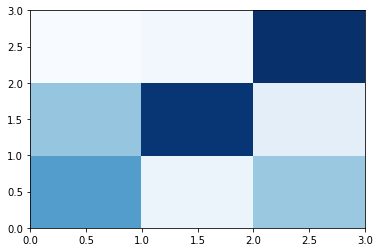

In [36]:
true_labels_for_agglo_complete = createTrueLabels({"Beauty & Spas" : 0, "Shopping" : 1,  "Bars" : 2 })

C_agglo_complete= metrics.confusion_matrix(agglo_labels_complete, true_labels_for_agglo_complete)
print(C_agglo_complete)
plt.pcolormesh(C_agglo_complete, cmap=plt.cm.Blues)

In [37]:
mapped_agglo_complete_labels, C_agglo_complete = cluster_class_mapping(agglo_labels_complete, true_labels_for_agglo_complete)
p = metrics.precision_score(true_labels_for_agglo_complete, mapped_agglo_complete_labels, average=None)
print(p,"\n")
r = metrics.recall_score(true_labels_for_agglo_complete, mapped_agglo_complete_labels, average = None)
print(r,"\n")

[0.56351039 0.6616     0.96685714] 

[0.59079903 0.91179713 0.67249603] 



In [38]:
# Agglomerative clustering with single linkage

X_pd = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
agglo_single = sk_cluster.AgglomerativeClustering(linkage = 'single', n_clusters=3)
agglo_labels_single = agglo_single.fit_predict(X_pd) # dense data required
printAgglomerativeTopLabelsPerCluster(X_pd, agglo_labels_single)


Cluster 0:
food
hair
bar
store
menu
nails
drinks
beer
ordered
night


Cluster 1:
paddle
islands
lake
tandem
canoe
tour
instructors
island
boat
waterfront


Cluster 2:
thermostat
tech
nest
installed
faulty
troubleshoot
sensor
defective
wires
product




Φαίνεται πως το cluster 1 με αυτή τη μέθοδο κατέληξε να είναι cluster kano & kayak και το cluster 2 ηλεκτρονικά, οπότε δεν έχει μεγάλη σημασία τι true labels θα δώσω γι'αυτά τα δύο, εφόσον δεν ταιριάζουν με τις κατηγορίες που έχουμε στη διάθεση μας έτσι και αλλιώς.

[[1258  826  905]
 [   0    0    1]
 [   0    0    1]]


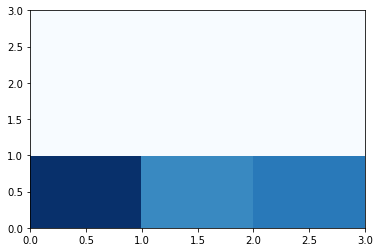

In [39]:
trueLabelsForAggloSingle = createTrueLabels({"Beauty & Spas" : 1, "Shopping" : 2,  "Bars" : 0 })
C_agglo_single= metrics.confusion_matrix(agglo_labels_single, trueLabelsForAggloSingle)
print(C_agglo_single)
plt.pcolormesh(C_agglo_single, cmap=plt.cm.Blues)

In [40]:
mapped_agglo_single_labels, C_agglo_single = cluster_class_mapping(agglo_labels_single, trueLabelsForAggloSingle)
p = metrics.precision_score(trueLabelsForAggloSingle, mapped_agglo_single_labels, average=None)
print(p,"\n")
r = metrics.recall_score(trueLabelsForAggloSingle, mapped_agglo_single_labels, average = None)
print(r,"\n")

[0.42087655 0.         1.        ] 

[1.         0.         0.00220507] 



c:\users\j\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Agglomerative clustering with ward linkage

X_pd = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
agglo_ward = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters=3)
agglo_labels_ward = agglo_ward.fit_predict(X.toarray()) # dense data required
printAgglomerativeTopLabelsPerCluster(X_pd, agglo_labels_ward)


Cluster 0:
hair
store
massage
cut
salon
appointment
shop
haircut
stylist
products


Cluster 1:
food
bar
menu
drinks
beer
ordered
restaurant
night
chicken
patio


Cluster 2:
nails
nail
shellac
manicure
pedicure
salon
mani
polish
pedi
gel




Eδώ φαίνεται πως προέκυψαν δύο clusters για beauty & spas, με λιγάκι διαφορετικές κορυφαίες λέξεις. Έτσι, αναγκαστικά κάποιο από τα δύο clusters δε θα ταιριάξει καλά με το true label του και αυτό θα γίνει ξεκάθαρο στο confusion matrix. Θα προτιμήσω να αναθέσω το label shopping στο cluster 0, μιας και περιέχει κάποιες ταιριαστές λέξεις τουλάχιστον (π.χ store, shop).

[[ 780    0  587]
 [ 127 1258   31]
 [   0    0  208]]


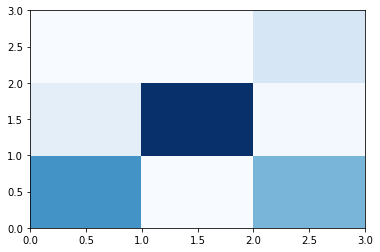

In [42]:
trueLabelsForAggloWard = createTrueLabels({"Beauty & Spas" : 2, "Shopping" : 0,  "Bars" : 1 })
C_agglo_ward= metrics.confusion_matrix(agglo_labels_ward, trueLabelsForAggloWard)
print(C_agglo_ward)
plt.pcolormesh(C_agglo_ward, cmap=plt.cm.Blues)

In [43]:
mapped_agglo_ward_labels, C_agglo_ward = cluster_class_mapping(agglo_labels_ward, trueLabelsForAggloWard)
p = metrics.precision_score(trueLabelsForAggloWard, mapped_agglo_ward_labels, average=None)
print(p,"\n")
r = metrics.recall_score(trueLabelsForAggloWard, mapped_agglo_ward_labels, average = None)
print(r,"\n")

[0.57059254 0.88841808 1.        ] 

[0.85997795 1.         0.25181598] 



In [12]:
# Agglomerative clustering with average linkage

X_pd = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
agglo_average = sk_cluster.AgglomerativeClustering(linkage = 'average', n_clusters=3)
agglo_labels_average = agglo_average.fit_predict(X_pd) # dense data required
printAgglomerativeTopLabelsPerCluster(X_pd, agglo_labels_average)


Cluster 0:
food
hair
bar
store
menu
nails
drinks
beer
ordered
night


Cluster 1:
cigars
cigar
tobacco
pipe
cuban
selection
pipes
shop
owner
brands


Cluster 2:
knife
knives
blade
sharp
japanese
butter
paper
rows
cuts
cutting




[[ 899 1258  826]
 [   7    0    0]
 [   1    0    0]]


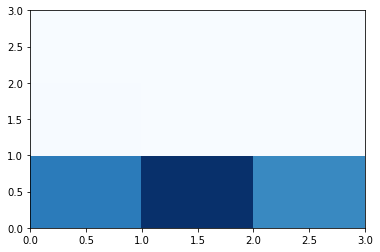

In [13]:
trueLabelsForAggloAverage = createTrueLabels({"Beauty & Spas" : 2, "Shopping" : 0,  "Bars" : 1 })
C_agglo_average= metrics.confusion_matrix(agglo_labels_average, trueLabelsForAggloAverage)
print(C_agglo_average)
plt.pcolormesh(C_agglo_average, cmap=plt.cm.Blues)

In [14]:
mapped_agglo_average_labels, C_agglo_average = cluster_class_mapping(agglo_labels_average, trueLabelsForAggloAverage)
p = metrics.precision_score(trueLabelsForAggloAverage, mapped_agglo_average_labels, average=None)
print(p,"\n")
r = metrics.recall_score(trueLabelsForAggloAverage, mapped_agglo_average_labels, average = None)
print(r,"\n")

[1.        0.4217231 0.       ] 

[0.00882029 1.         0.        ] 



c:\users\j\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Εδώ παραθέτω το confusion matrix και τα precision/recall scores για τον αλγόριθμο k-means, καθώς ξέχασα νωρίτερα.

[[ 483    0    0]
 [ 341  876  152]
 [   2   31 1106]] 

[1.         0.63988313 0.97102722] 

[0.58474576 0.96582139 0.87917329] 



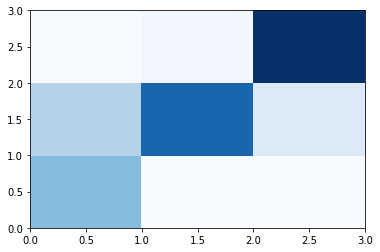

In [43]:
C = metrics.confusion_matrix(kmeans_labels, valid_labels_for_kmeans_three)
mapped_kmeans_labels, C = cluster_class_mapping(kmeans_labels, valid_labels_for_kmeans_three)
print (C,"\n")
p = metrics.precision_score(valid_labels_for_kmeans_three, mapped_kmeans_labels, average=None)
print(p,"\n")
r = metrics.recall_score(valid_labels_for_kmeans_three, mapped_kmeans_labels, average = None)
print(r,"\n")

plt.pcolormesh(C, cmap=plt.cm.Blues)

<html>
<body>
<p style="font-size:15px;color:#64B5F6;">Ερώτημα 2</p>
</body>
</html>

Text(0, 0.5, 'Error')

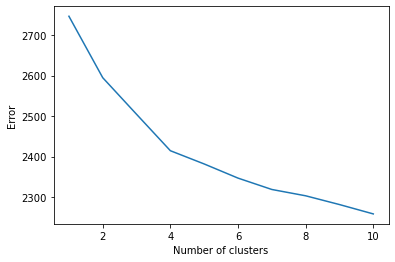

In [23]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)
        
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Text(0, 0.5, 'silhouette score')

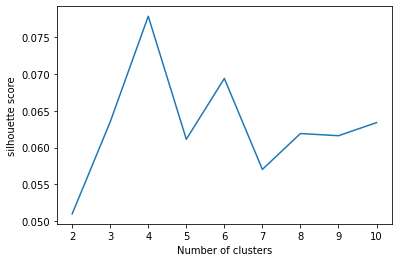

In [24]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')


In [25]:
k=4
kmeans_four = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_four.fit_predict(X)

asc_order_centroids_four = kmeans_four.cluster_centers_.argsort()#[:, ::-1]
order_centroids_four = asc_order_centroids_four[:,::-1]
terms = vectorizer.get_feature_names()
kmeans_four_labels = kmeans_four.labels_
error_four = kmeans_four.inertia_

print ("The total error of the clustering is: ", error_four)
print ('\nCluster Centroids')
print (order_centroids_four)
print("\nTop terms per cluster:")

for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids_four[i, :20]:
        print (' %s' % terms[ind])

print("\nClustering labels: ", kmeans_four_labels)

C_four = metrics.confusion_matrix(kmeans_four_labels, valid_labels)
mapped_kmeans_four_labels, C_four = cluster_class_mapping(kmeans_four_labels, valid_labels)
print (C_four,"\n")
p_four = metrics.precision_score(valid_labels, mapped_kmeans_four_labels, average=None)
print(p_four,"\n")
r_four = metrics.recall_score(valid_labels, mapped_kmeans_four_labels, average = None)
print(r_four,"\n")

plt.pcolormesh(C_four, cmap=plt.cm.Blues)

The total error of the clustering is:  2414.2937222103114

Cluster Centroids
[[10888 10885 14876 ... 10286 10285     0]
 [ 7563  4176 14300 ...  9995  9993     0]
 [16070 10156 14952 ... 13297 12020  1350]
 [ 6629  1216 10326 ... 15626 17688 12086]]

Top terms per cluster:
Cluster 0:
 nails
 nail
 shellac
 manicure
 pedicure
 salon
 mani
 polish
 pedi
 gel
 appointment
 job
 massage
 clean
 cuticles
 spa
 salons
 waxing
 colour
 feet
Cluster 1:
 hair
 cut
 salon
 haircut
 stylist
 barber
 appointment
 colour
 stylists
 cuts
 job
 trim
 blow
 barbers
 highlights
 style
 haircuts
 wash
 salons
 cutting
Cluster 2:
 store
 massage
 shop
 buy
 bike
 selection
 stores
 items
 products
 sales
 appointment
 spa
 bought
 helpful
 stuff
 room
 help
 dress
 shopping
 phone
Cluster 3:
 food
 bar
 menu
 beer
 drinks
 ordered
 restaurant
 chicken
 night
 patio
 fries
 pub
 wings
 server
 burger
 delicious
 table
 drink
 salad
 sauce

Clustering labels:  [3 3 2 ... 3 2 3]


NameError: name 'valid_labels' is not defined

<html>
<body>
<p style="font-size:15px;color:#64B5F6;">Ερώτημα 3</p>
</body>
</html>

Παρακάτω αποθηκεύω τις επιχειρήσεις οι οποίες ανήκουν στο cluster Beauty & Spa, αλλά πάνε στο cluster που αντιστοιχεί στο Shopping.

In [88]:
experiment_counter = 0
index = 0

experiment_businesses_ids = []
experiment_businesses_reviews = []

centers = kmeans.cluster_centers_
for business_id in business_dict.keys():
    if(business_dict[business_id][0] == "Beauty & Spas" and kmeans_labels[index] == 1):
        experiment_businesses_ids.append(business_id)
        experiment_businesses_reviews.append(business_dict[business_id][1] )
        experiment_counter += 1
    index += 1


Εδώ, έχοντας πλέον τις επιχειρήσεις αυτές που κατατάχθηκαν λάθος, εκμεταλλεύομαι το dataset επιχειρήσεων έτσι ώστε να μετρήσω τις διαφορετικές εμφανίσεις κατηγοριών που αφορούν αυτές τις επιχειρήσεις.

In [85]:
categories_counter_df = pd.DataFrame({'Beauty & Spas':[0]}, index = {'Category Counter'})

with open('yelp_academic_dataset_business.json', 'r',encoding = "utf8") as f:
    for line in f.readlines():
        dictionary = json.loads(line)
        if(dictionary['city'] == 'Toronto' and  dictionary['review_count'] >= 10):
            business_id = dictionary['business_id']
            if(business_id in experiment_businesses_ids):
                categories = dictionary['categories'].split(', ') 
                for i in range(len(categories)):
                    if(categories[i] not in categories_counter_df.columns):
                        categories_counter_df[categories[i]] = 1
                    else:
                        categories_counter_df[categories[i]] = categories_counter_df[categories[i]] + 1
             
categories_counter_df = categories_counter_df.sort_values(by=['Category Counter'], ascending=False, axis=1)  
counters_lst = categories_counter_df.values
columns_lst = categories_counter_df.columns.tolist()

for i in range(len(columns_lst)):
    print(str(columns_lst[i]) + " : " + str(counters_lst[0][i]))

Beauty & Spas : 341
Health & Medical : 109
Massage : 98
Skin Care : 98
Hair Removal : 97
Day Spas : 87
Shopping : 74
Cosmetics & Beauty Supply : 56
Waxing : 47
Medical Spas : 41
Massage Therapy : 38
Eyelash Service : 36
Laser Hair Removal : 36
Acupuncture : 35
Tattoo : 33
Hair Salons : 29
Makeup Artists : 22
Nail Salons : 22
Doctors : 22
Physical Therapy : 21
Tanning : 19
Piercing : 19
Eyebrow Services : 18
Active Life : 17
Fitness & Instruction : 16
Threading Services : 15
Chiropractors : 15
Barbers : 13
Event Planning & Services : 11
Yoga : 11
Education : 10
Reflexology : 9
Specialty Schools : 9
Fashion : 9
Hotels & Travel : 8
Naturopathic/Holistic : 8
Drugstores : 8
Jewelry : 7
Medical Centers : 6
Permanent Makeup : 6
Home & Garden : 5
Weight Loss Centers : 5
Food : 5
Hotels : 5
Cosmetology Schools : 5
Traditional Chinese Medicine : 5
Women's Clothing : 5
Nutritionists : 5
Local Flavor : 5
Acne Treatment : 4
Arts & Crafts : 4
Cosmetic Surgeons : 4
Pilates : 4
Arts & Entertainment : 

Τέλος, εκμεταλλεύομαι τα reviews αυτών των επιχειρήσεων ώστε να δω ποιες λέξεις εμφανίζονται συχνότερα σε αυτές και να καταλάβω γιατί κατατάχθηκαν σε λάθος cluster.

In [108]:
concatenated_reviews = ''
for review in experiment_businesses_reviews:
    concatenated_reviews += review
    
concatenated_reviews_lst = [concatenated_reviews]    
newVectoriser = sk_text.CountVectorizer(token_pattern=r'[a-z]+', stop_words = 'english')
count_matrix = newVectoriser.fit_transform(concatenated_reviews_lst)
counted_words = newVectoriser.get_feature_names()
count_matrix_arr = count_matrix.toarray()

for i in range(len(count_matrix_arr[0])):
    if(count_matrix_arr[0][i] > 500):
        print(str(counted_words[i]) + " : " + str(count_matrix_arr[0][i]))

able : 628
actually : 737
amazing : 1688
appointment : 2244
area : 1292
ask : 689
asked : 1301
away : 749
bad : 808
best : 1535
better : 1189
big : 530
bit : 1161
body : 1202
book : 732
booked : 808
brows : 543
business : 594
busy : 560
called : 680
came : 1294
care : 876
change : 661
check : 604
clean : 1898
clinic : 680
come : 1336
comfortable : 777
coming : 717
couple : 578
customer : 1081
d : 976
day : 1680
days : 614
deal : 636
decided : 640
definitely : 1685
desk : 590
did : 2756
didn : 2197
different : 970
does : 696
doing : 805
don : 2345
end : 872
experience : 3068
extremely : 705
eyebrows : 659
face : 953
facial : 1582
far : 515
feel : 1791
feeling : 501
felt : 1364
free : 707
friend : 759
friendly : 1887
gave : 778
getting : 1173
girl : 587
going : 2014
good : 2977
got : 2161
great : 3833
groupon : 711
hair : 1495
happy : 861
hard : 570
having : 686
help : 638
helpful : 562
high : 522
highly : 763
home : 596
hot : 869
hotel : 540
hour : 793
hours : 569
job : 943
just : 3774
